<p id="part0"></p>

<p style="font-family: Times New Roman; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: left; color: black"> Project1(Alx-t): Investigate a Dataset (No Show Apointment) </p>
<p style="font-family: Times New Roman; line-height: 2; font-size: 13px; font-weight: bold; letter-spacing: 2px; text-align: left; color: black">By: Emmanuel Favour</p>


<img src="https://media.sciencephoto.com/image/m9201395/800wm/M9201395-Doctor_and_patient_consultation.jpg" width="100%" align="center" hspace="5%" vspace="5%"/>
​

<p style="font-family: Times New Roman; font-size: 20px; font-style: normal; font-weight: bold; letter-spacing: 3px; color: black ; line-height:1.0"> TABLE OF CONTENT</p>
​

>* [Introduction](#section-one)


>* [Data Wrangling](#section-two)


>* [Exploratory Data Analysis](#section-three)


>* [Conclusions](#section-four)

​

<a id="section-one"></a>
<h1 id="basics" style="font-family: Arials; font-size: 20px; font-style: bold; font-weight: bold; letter-spacing: 3px; color: #Fblack"> 
    1. INTRODUCTION 🎖
        
    
</h1>

This is my project for the Alx-t project 1 case study - Case study one which is about No Show Apointment. The full documentation of this case study can be seen in the link below.

<https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf>

The original dataset can be downloaded directly from kaggle via the link below:

<https://www.google.com/url?q=https://www.kaggle.com/joniarroba/noshowappointments&sa=D&ust=1532469042118000>

This project is essential so as to test the understanding of learners about the 4 data analytics process has been treated so far in this course.

>* Introduction

>* Data Wrangling

>* Exploratory Data Analysis

>* Conclusions


<p style="font-family: Times New Roman; line-height: 2; font-size: 15px; font-weight: bold; letter-spacing: 2px; text-align: left; color: black">Question(s) for Analysis</p>

>**1**: How appointment schedule are affected  by weekDays.

> **2**: How appointment schedule are affected by Neighbourhood.

> **3**: How appointment schedule are affected by Age.

> **4**: How appointment schedule are affected by Hour of the day(time).

> **5**: How appointment schedule are affected by Gender.

> **6**: How appointment schedule are affected by Other factors or conditions.

#### Loading all libraries...

In [2]:
#Loading all libraries needed.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import datetime
from datetime import date
import warnings
from warnings import filterwarnings
filterwarnings("ignore")# to ingore some filter warnings especially from the seaborn library.



#### Loading Datasets....

In [3]:
#loading dataset
dt = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
dt.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#getting all columns
dt.columns


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
#getting number of rows and columns
dt.shape

(110527, 14)

In [6]:
#getting other infomation about the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



<a id="section-two"></a>
<h1 id="basics" style="font-family: Arials; font-size: 16px; font-style: bold; font-weight: bold; letter-spacing: 3px; color: #Fblack"> 
    2. Data Wrangling & Cleaning 🎖
        
    
</h1>

In [7]:
#getting statistical information about the dataset

dt.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the describe() function it is seen that the minimum age count is -1 and this should be a concern a no age should be less than 0 hence further findings are made as regard age. Also the column head 'handcap' is probably mispelt,there is no such word. it will be renamed to Handicap.

In [8]:
#value_count for unique numbers
dt['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [9]:
#Droping the row that has it age value as -1 since it wouldnt affect the entire analysis result much because its just a row.
dt = dt[dt.Age > -1]

In [10]:
#Confirming if age -1 has been dropped.
dt['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [11]:
#Renaming column name Handcap to Handicap. 
dt = dt.rename(columns = {'Handcap':'Handicap', 'No-show':'Absent'})
dt.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Absent
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


In [12]:
#Checking for data types
dt.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handicap            int64
SMS_received        int64
Absent             object
dtype: object

In [13]:
#checking for unique values in columns
dt.nunique()

PatientId          62298
AppointmentID     110526
Gender                 2
ScheduledDay      103548
AppointmentDay        27
Age                  103
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMS_received           2
Absent                 2
dtype: int64

It can as well be seen that column name Handicap has more than 2 unique values i.e outliers are present. All values greater than Zero will be renamed to 1.

In [14]:
#Getting value counts for Handicap.
dt['Handicap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [15]:
#replacing any value that is greater than 1 in the handicap column by 1.
new_handicap = []
for val in dt['Handicap']:
    if val > 1:
        val = 1
    new_handicap.append(val)

dt['Handicap'] = new_handicap


In [16]:
#Confirming that the values greater than 1 in the Handicap column have been replaced.
dt['Handicap'].value_counts()

0    108285
1      2241
Name: Handicap, dtype: int64

In [17]:
#Checking for possible duplicates.
dt.duplicated()
sum(dt.duplicated())

0

In [18]:
#Checking for any null value.
dt.isnull().sum()
# sum(dt.isnull())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
Absent            0
dtype: int64

**since the respective columns ('Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received') as only to distinct values '0' and '1'.for clarity sake,let  0 indicates "No" and 1 indicates "Yes" , the value of the respective columns are changed to yes or No for better understanding of the data set.**

In [19]:
#Creating a function that will change columns with 0's and 1's to 'No' and 'Yes' respectively for clarity sake.
def cate(col):
    bool_ = []
    for val in col:
        if val == 0:
            val= 'No'
        elif val == 1:
            val = 'Yes'
        bool_.append(val)
    return bool_

In [20]:
#calling the function created above to change the 0 and 1 value to No and Yes in the rescpective columns below,
dt['Scholarship'] = cate(dt['Scholarship']) 
dt['Hipertension'] = cate(dt['Hipertension'])
dt['Diabetes'] = cate(dt['Diabetes'])
dt['Alcoholism'] = cate(dt['Alcoholism'])
dt['Handicap'] = cate(dt['Handicap'])
dt['SMS_received'] = cate(dt[ 'SMS_received'])

In [21]:
#Confirming the changed values
dt.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Absent
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,No,No,No,No,No,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No,No,No,No,No,No,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No,No,No,No,No,No,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No


In [22]:
#Checking for unique values in each column
dt.nunique()

PatientId          62298
AppointmentID     110526
Gender                 2
ScheduledDay      103548
AppointmentDay        27
Age                  103
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handicap               2
SMS_received           2
Absent                 2
dtype: int64

In [23]:
#changing the datatype from string to datetime
dt['ScheduledDay'] = pd.to_datetime(dt['ScheduledDay'])
dt['AppointmentDay'] = pd.to_datetime(dt['AppointmentDay'])

In [24]:

#confirming if the datatype for scheduleDay and AppointmentDay have been changed. have been changed.
dt.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                    object
Hipertension                   object
Diabetes                       object
Alcoholism                     object
Handicap                       object
SMS_received                   object
Absent                         object
dtype: object

In [25]:
#pulling the Hour_of_day from the ScheduledDay column(datetime)
dt['HourofDay'] = pd.DatetimeIndex(dt['ScheduledDay']).hour


In [26]:
#pulling the name of the weekday from the AppointmentDay column(datetime)
dt['WeekDay'] = dt['AppointmentDay'].dt.day_name()

In [27]:
#Confirming if the Hourofday and WeekDay have been created
dt.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Absent,HourofDay,WeekDay
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No,18,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,No,No,No,No,No,No,16,Friday



<a id="section-three"></a>
<h1 id="basics" style="font-family: Arials; font-size: 20px; font-style: bold; font-weight: bold; letter-spacing: 3px; color: #Fblack"> 
    3. Exploratory Data Analysis 🎖
        
    
</h1>

In [28]:
#Getting statistics of cleaned dataset.
dt.describe()

,PatientId,AppointmentID,Age,HourofDay
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,10.774542
std,2.560943e+14,7.129544e+04,23.110026,3.216192
min,3.921784e+04,5.030230e+06,0.000000,6.000000
25%,4.172536e+12,5.640285e+06,18.000000,8.000000
50%,3.173184e+13,5.680572e+06,37.000000,10.000000
75%,9.438963e+13,5.725523e+06,55.000000,13.000000
max,9.999816e+14,5.790484e+06,115.000000,21.000000


**from the describe function, it can be deduced that**
* The maximum Age is 115 (oldest)
* The minimum Age is 0 (youngest)
* The peak Appointment time by hour is 21ist hour
* The least Appointment time by hour is 6th hour


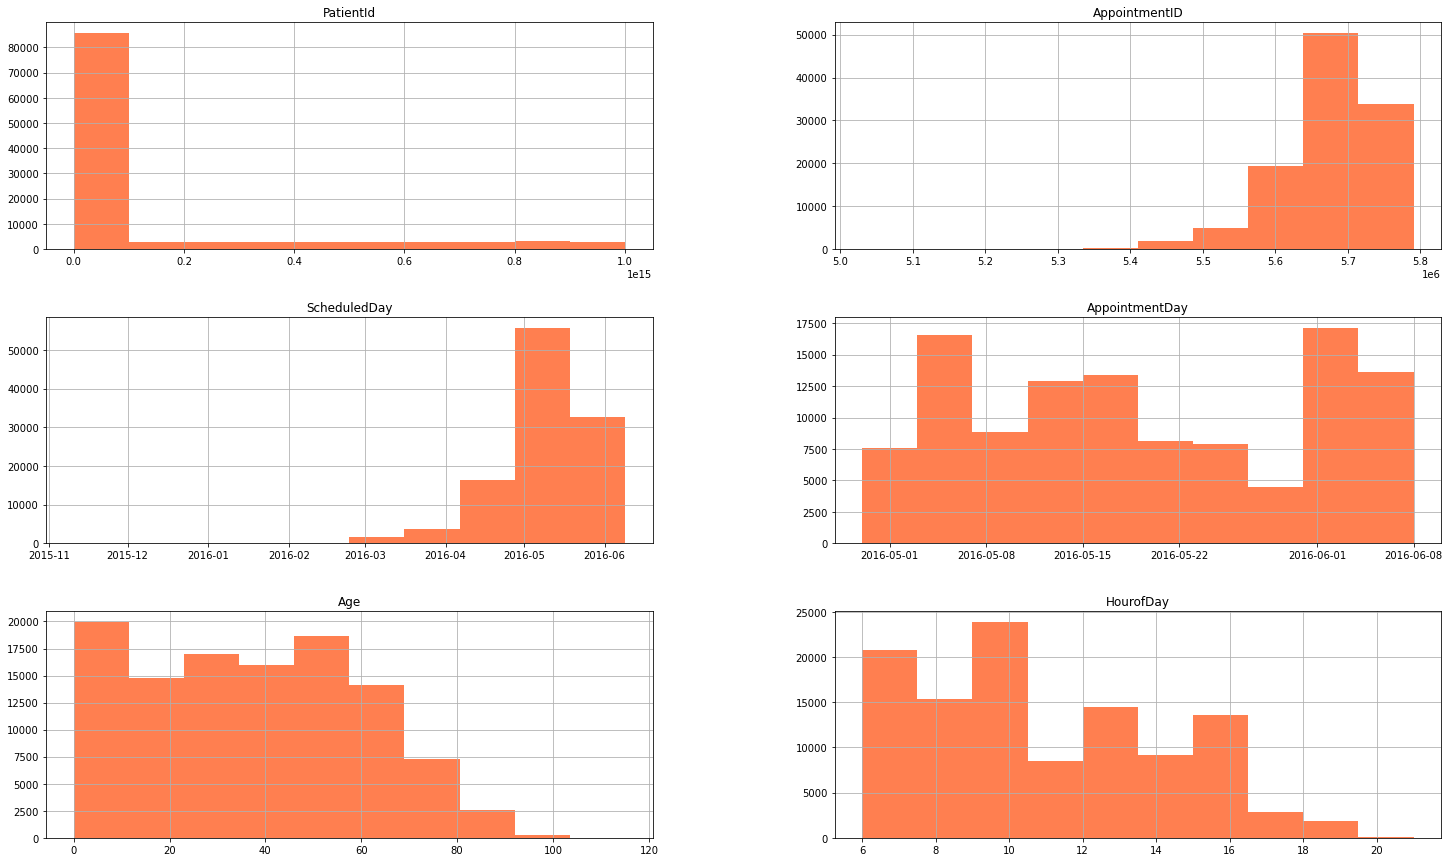

In [33]:
#A random histogram of the dataset
dt.hist(figsize = (25,15), color = 'coral' );
# facecolor = '#C4A484'

Weekday with the most appointment schedule

In [34]:
#total number of appointmentby weekday
dt['WeekDay'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: WeekDay, dtype: int64

### Defining some functions to allow for re-use

In [ ]:
'A subplot showing Count of absent with other Conditions.'

In [237]:
#writting functions to avoid re-writing some codes

def density_plot(val, col_a, col_b):
    '''
    This function helps to get the probability density distribution of a particular variable.
    '''
    plt.figure(figsize=(20,7))
    sns.kdeplot(dt.loc[(dt['Absent']=='Yes'),
                val], color= col_a, shade=True, Label ='Yes')

    sns.kdeplot(dt.loc[(dt['Absent']=='No'), 
                val], color= col_b, shade=True, Label ='No')
    plt.legend()  
    plt.xlabel(val)
    plt.ylabel('Probability Density')
    
    
def crosstab(index, col_name, bool_):
    '''
    The crosstab () function is used to compute a simple cross tabulation of two (or more) factors
    '''
    r = pd.crosstab(index, col_name, normalize = bool_)
    return r

def condition_analysis(bool_, title):
    '''
    This function use a subplot to plot all other conditions or factor such as 'sms_recieved', 'Handicap', 
    'Alcoholism', 'Scholarship', 'Hipertension', 'Diabetes' with the help of the crosstab function. 
    '''
    fig, ((ax1, ax2, ax3),(ax4, ax5, ax6))  = plt.subplots(nrows = 2, ncols = 3, facecolor = '#C4A484',figsize=(100, 100))
    fig.tight_layout(h_pad=100, w_pad=60, pad=40)
    fig.suptitle(title, fontweight ="bold", fontsize = 20.0)
#     r = pd.crosstab(index, col_name, normalize = bool_)
    dk= [
        pd.crosstab(dt.SMS_received, dt.Absent, normalize = bool_ ).plot(ax = ax1, kind = 'bar', figsize = (20,10), title = 'Count by sms_recieved vs sms_recieved ').set_ylabel('Count by sms_recieved'),
        pd.crosstab(dt.Handicap, dt.Absent, normalize = bool_).plot(ax = ax2, kind = 'bar', figsize = (20,10), title = 'Count by Handicap vs Handicap').set_ylabel('Count by Handicap'),
        pd.crosstab(dt.Alcoholism, dt.Absent, normalize = bool_).plot(ax = ax3, kind = 'bar', figsize = (20,10), title =  'Count by Alcoholism vs Alcoholism').set_ylabel('Count by Alcoholism'),
        pd.crosstab(dt.Scholarship, dt.Absent, normalize = bool_).plot(ax = ax4, kind = 'bar', figsize = (20,10), title = 'Count by Scholarship vs Scholarship').set_ylabel('Count by Scholarship'),
        pd.crosstab(dt.Hipertension, dt.Absent, normalize = bool_).plot(ax = ax5, kind = 'bar', figsize = (20,10), title = 'Count by Hipertension vs Hipertension').set_ylabel('Count by Hipertension'),
        pd.crosstab(dt.Diabetes, dt.Absent, normalize = bool_).plot(ax = ax6, kind = 'bar', figsize = (20,10), title = 'Count by Diabetes vs Diabetes').set_ylabel('Count by Diabetes')
        
        ]
    return dk



<a id="b"></a>
### Analysis by weekDay   

Weekday with the most appointment schedule
>* The total appointment schedule by weekday in decreasing order are as follows Wednesday,Tuesday Monday, Friday, Thursday, Saturday. Appointment are not scheduled for sundays.
>* Since wednessday has the highest number of appointment, it is a truism that it will have maybe the most and least number of absentees hence further  comparative analysis was carried out and the values gotten where very close, but yet the weekdays with higher proportion of showing up are in decreasing order as follows;Thursday,Wednesday,Tuesday,Monday,Friday,Saturday hence it is pertinent but not exactly correct(further data are required to be affirmative.) to say that patients will most likely show on thursday and not show on Saturday.


In [238]:
#total number of appointmentby weekday
dt['WeekDay'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: WeekDay, dtype: int64

In [239]:
#Calling the crosstab function to  crosstab () function to compute cross-tabulation of column WeekDay, Absent.

Weekly_A = crosstab(dt.WeekDay, dt.Absent,False)
weekly = Weekly_A.sort_values('No', ascending = False) 
weekly

Absent,No,Yes
WeekDay,,
Wednesday,20774,5093
Tuesday,20488,5152
Monday,18024,4690
Friday,14982,4037
Thursday,13909,3338
Saturday,30,9


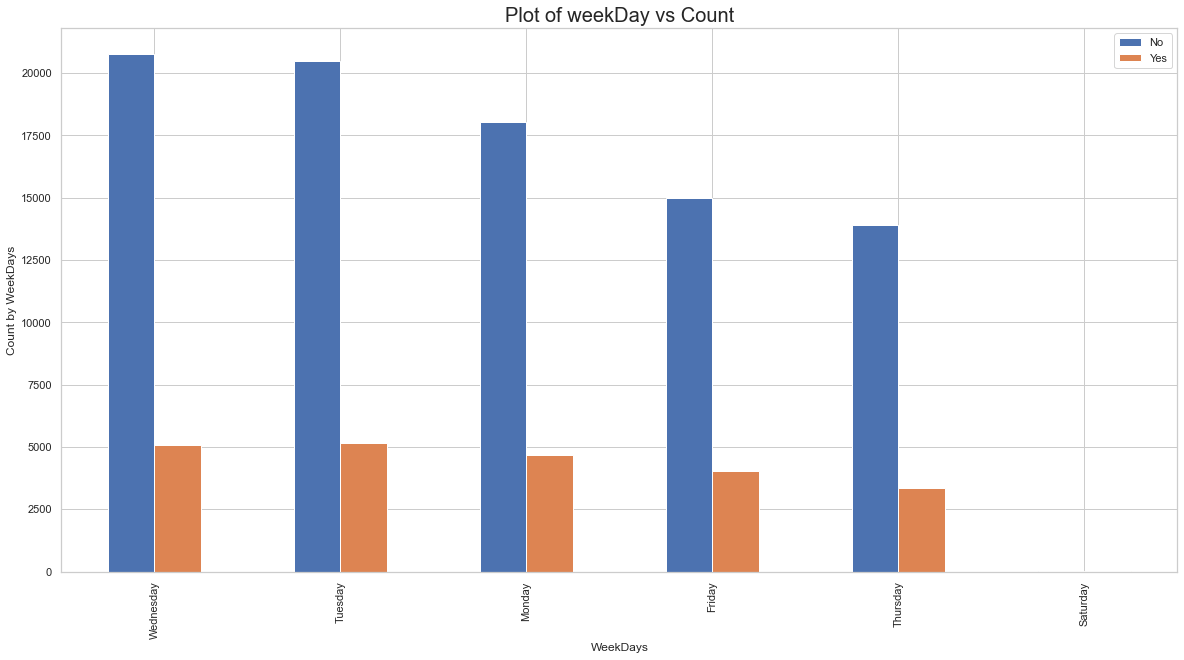

In [240]:
#plotting a bar to show the relationship between Weekday and  Absent options(yes or No)
weekly.plot(kind = 'bar', figsize = (20,10)).set_ylabel('Count by week')
plt.legend() 
plt.title('Plot of weekDay vs Count' , fontsize = 20.0)
plt.xlabel('WeekDays')
plt.ylabel('Count by WeekDays');
    

In [241]:
#Calling the crosstab function to  crosstab () function to compute cross-tabulation of WeekDay, Absent(yes or No) by setting the normalize statement to index so as to get them in proportion

Weekly_A = crosstab(dt.WeekDay, dt.Absent, 'index')
weekly_norm = Weekly_A.sort_values('No', ascending = False) 
weekly_norm

Absent,No,Yes
WeekDay,,
Thursday,0.806459,0.193541
Wednesday,0.803108,0.196892
Tuesday,0.799064,0.200936
Monday,0.793519,0.206481
Friday,0.787739,0.212261
Saturday,0.769231,0.230769


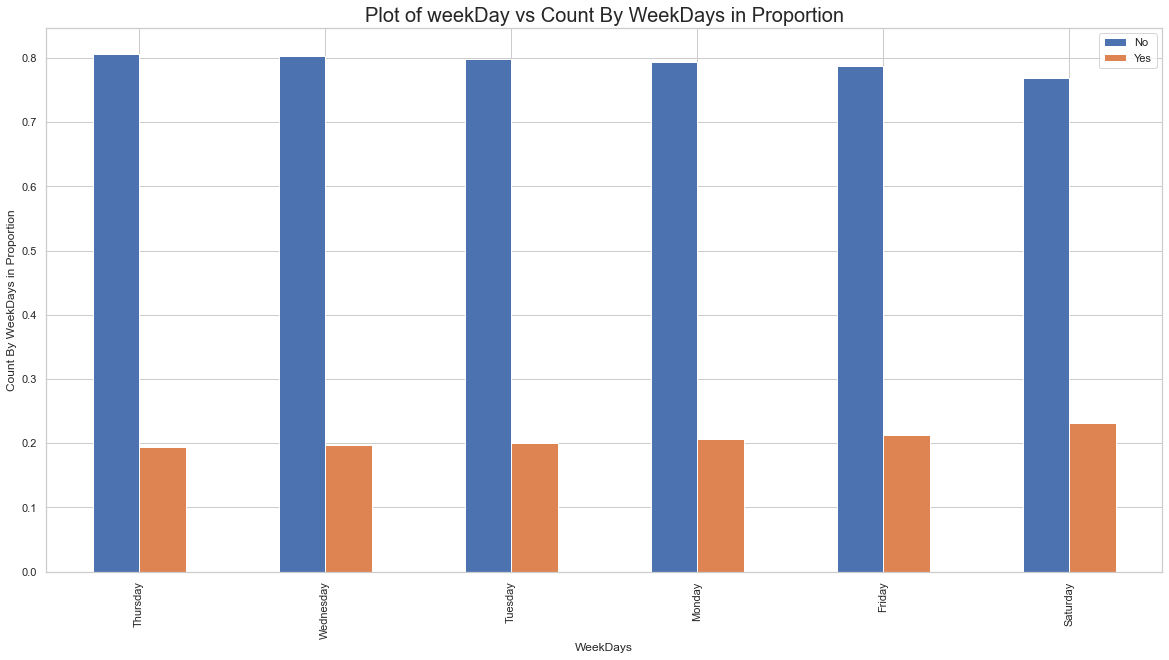

In [242]:
#plotting a bar to show the relationship between Weekday and  Absent options(yes or No)
weekly_norm.plot(kind = 'bar', figsize = (20,10)).set_ylabel('Count by week');
plt.legend()
plt.title('Plot of weekDay vs Count By WeekDays in Proportion' , fontsize = 20.0)
plt.xlabel('WeekDays')
plt.ylabel('Count By WeekDays in Proportion');
    

### Analysis by Neighbourhood

>* For the analysis of the neighbourhood,people from the following neighbourhood in decreasing order are most likely to go for their appointment JARDIM CAMBURI, MARIA ORTIZ, RESISTÊNCIA, JARDIM DA PENHA, SANTA MARTHA. it was observed that when the neighbourhood column was proportionlized, the top 5 places didn't have enough patients to consider for a fact if they were truely the highest neighbourhood in proportion to have patients present for there appointments.

In [243]:
#Getting number of neighbourhood
dt.Neighbourhood.nunique()

81

In [244]:
##Calling the crosstab function to  crosstab () function to compute cross-tabulation of columns Neighbourhood and Absent.
Neighbourhood_A = crosstab(dt.Neighbourhood, dt.Absent, False)
place = Neighbourhood_A.sort_values('No', ascending = False)
place.head()

Absent,No,Yes
Neighbourhood,,
JARDIM CAMBURI,6252,1465
MARIA ORTIZ,4586,1219
RESISTÊNCIA,3525,906
JARDIM DA PENHA,3246,631
SANTA MARTHA,2635,496


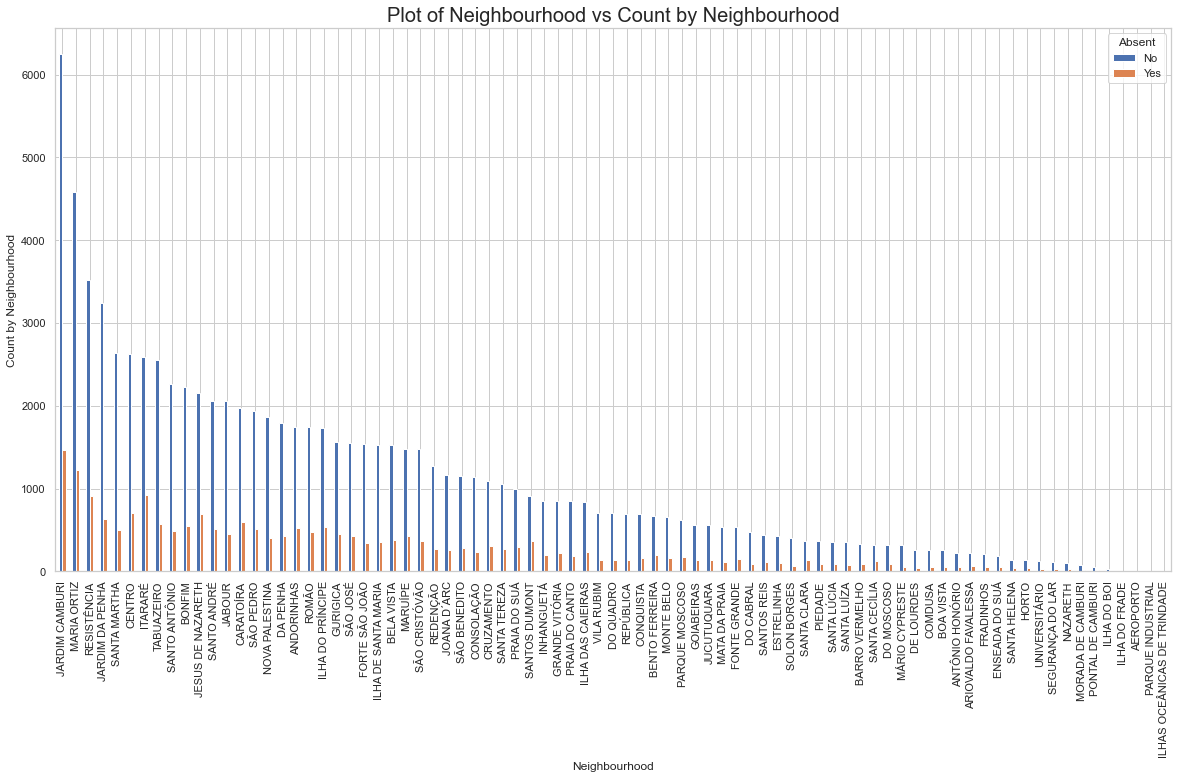

In [245]:
#plotting a bar to show the relationship between Neighbourhood and  Absent options(yes or No)
place.plot(kind = 'bar', figsize = (20,10)).set_ylabel('Count by Neighbourhood');
plt.title('Plot of Neighbourhood vs Count by Neighbourhood' , fontsize = 20.0);


In [246]:
#Calling the crosstab function to  crosstab () function to compute cross-tabulation of columns Neighbourhood and Absent but this time in proportion and this is achieved by setting normalize to be true..
Neighbourhood_A = crosstab(dt.Neighbourhood, dt.Absent, 'index')
place_norm = Neighbourhood_A.sort_values('No', ascending = False)
place_norm.head()

Absent,No,Yes
Neighbourhood,,
PARQUE INDUSTRIAL,1.000000,0.000000
ILHA DO BOI,0.914286,0.085714
AEROPORTO,0.875000,0.125000
MÁRIO CYPRESTE,0.854447,0.145553
SOLON BORGES,0.852878,0.147122


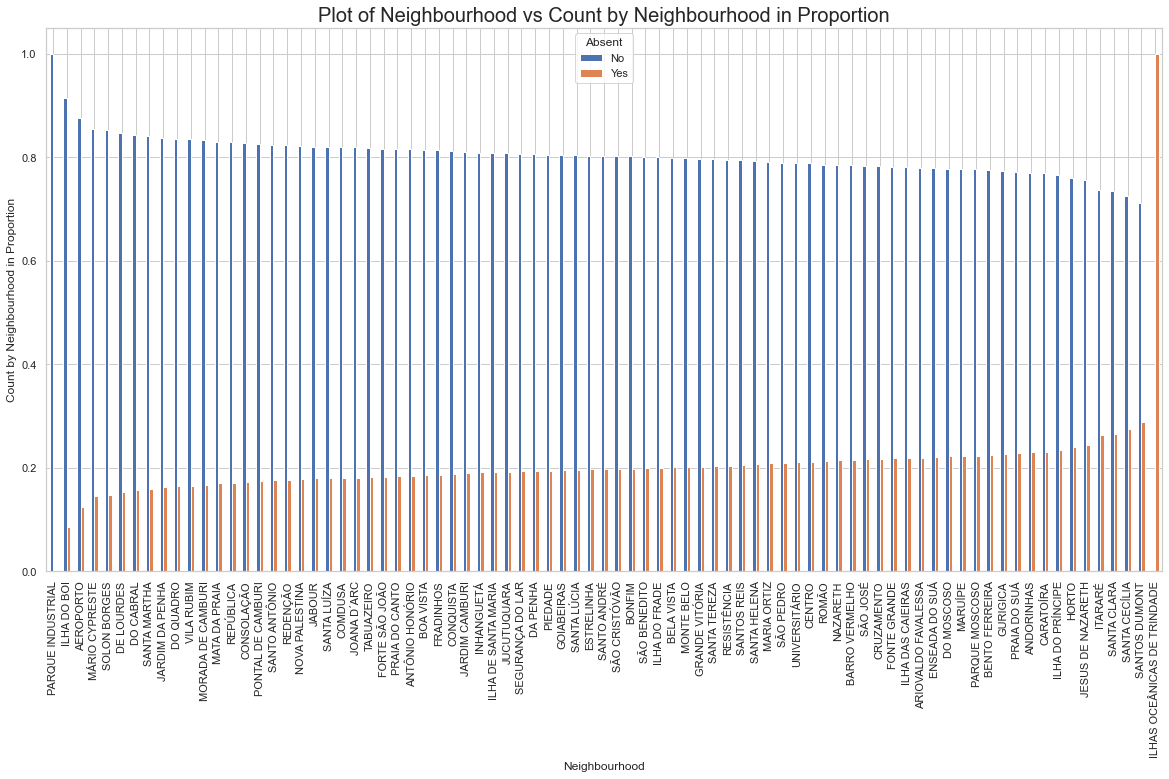

In [247]:
#plotting a bar to show the relationship between Neighbourhood and  Absent options(yes or No) in proportion.
place_norm.plot(kind = 'bar', figsize = (20,10)).set_ylabel('Count by Neighbourhood in Proportion');
plt.title('Plot of Neighbourhood vs Count by Neighbourhood in Proportion' , fontsize = 20.0);

### Analysis by Gender

 >* It is glaring that the appointment scheduled for females are more than that of the males but when the relationship is normalized in proportion it is seen that more males are likely to attend thier meetings than females.

In [248]:
#getting to know the total number males and females
dt.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [249]:
#Calling the crosstab function to  crosstab () function to compute cross-tabulation of Gender, Absent(yes or No).

Gender_A = crosstab(dt.Gender, dt.Absent, False)
gen = Gender_A.sort_values('No', ascending = False) 
gen

Absent,No,Yes
Gender,,
F,57245,14594
M,30962,7725


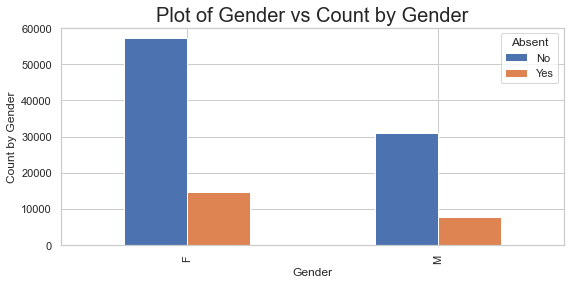

In [250]:
#plot showing the count of show and no_show by gender
gen.plot(kind = 'bar', figsize = (9,4)).set_ylabel('Count by Gender')
plt.title('Plot of Gender vs Count by Gender' , fontsize = 20.0);

In [251]:
##Calling the crosstab function to  crosstab () function to compute cross-tabulation of Gender, Absent(yes or No) by setting the normalize statement to True so as to get them in proportion
Gender_A = crosstab(dt.Gender, dt.Absent, 'index')
gen_norm = Gender_A.sort_values('No', ascending = False) 
gen_norm

Absent,No,Yes
Gender,,
M,0.800321,0.199679
F,0.796851,0.203149


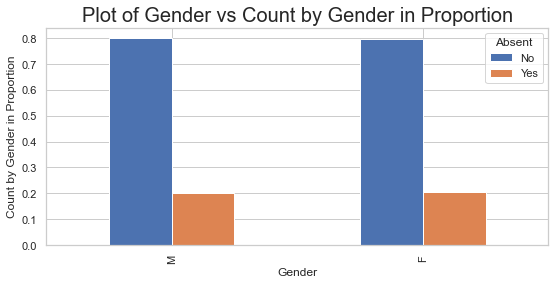

In [252]:
#plot showing the count of show and no_show by gender by proportion
gen_norm.plot(kind = 'bar', figsize = (9,4)).set_ylabel('Count by Gender in Proportion')
plt.title('Plot of Gender vs Count by Gender in Proportion' , fontsize = 20.0);

*from the above plot, it can be seen that female gender go for their scheduled appointment more than the male gender.*

### Analysis by HourofDay

>* The boxplot showing the distribution of hour of day is skewed to the right, the Hour spread is more to the right hence it is rightly skewed. from the second plot it shows that the the box for "No" has it spread more to the right hence more people were present for there  appointment from the 9th hour to the 13th hour. for the male and female comparison, theres is no much difference in the spread. For the option "Yes" the box is symetric while for "No" it is rightly skewed.
>* Appointments between the 9th hour and the 13th hour are most likely to be attended.
>* From the probability density curve, it was seen that the probability difference for patients to be either absent or present i.e yes or no varies across the distribution. From the 6th hour to the 13th hour, patients are more like to be present than absent but from the 14th hour to the 20th hour they are more likely to be absent.

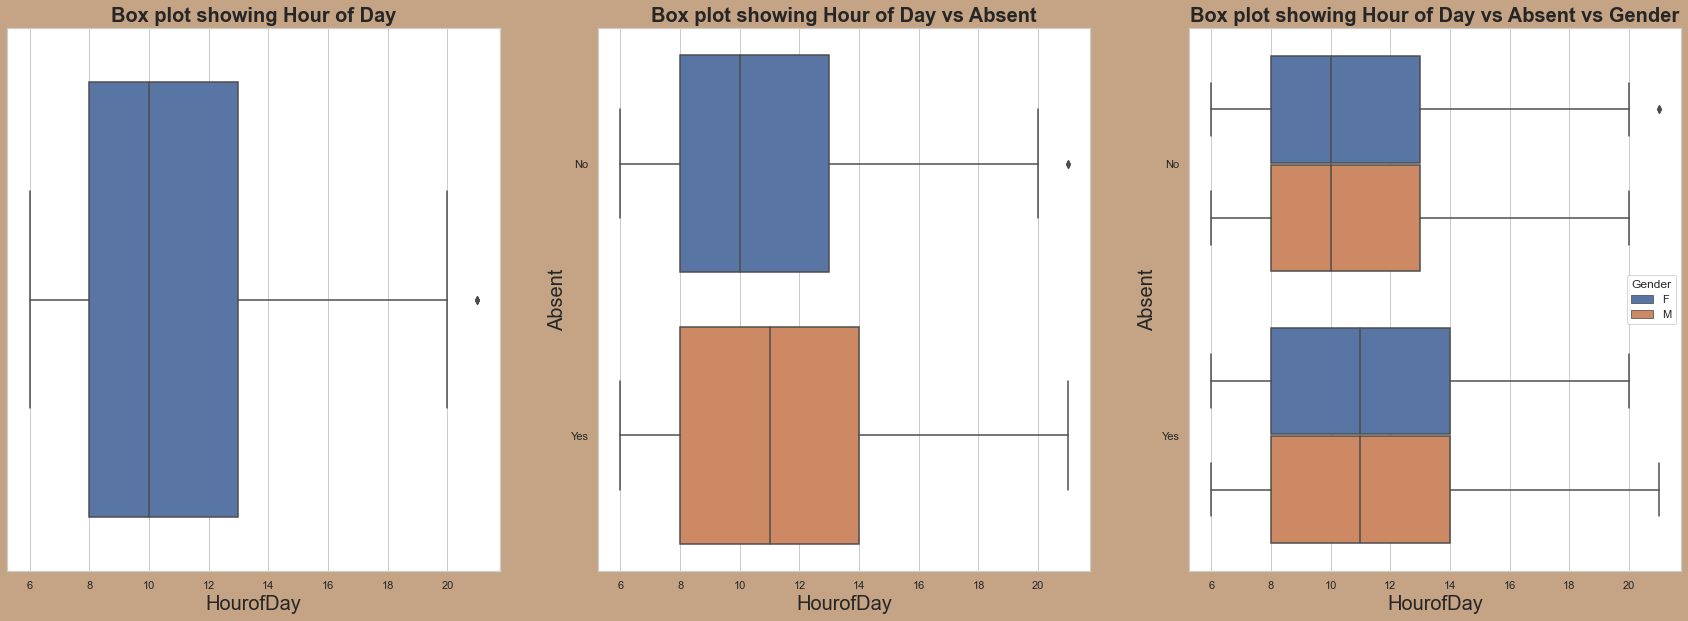

In [253]:
#Creating a boxplot to visualive the relationship between HourofDay,Absent and Gender.
fig, (ax1, ax2, ax3)  = plt.subplots(nrows = 1, ncols = 3, sharex = True, facecolor = '#C4A484', figsize=(30, 10))
sns.set(rc={'figure.figsize':(20,20)}, style='whitegrid')
sns.boxplot(data = dt
            ,x = 'HourofDay',
            ax = ax1)
sns.boxplot(data = dt
            ,x = 'HourofDay', y = 'Absent',
            ax = ax2,)
sns.boxplot(data = dt
            ,x = 'HourofDay', y = 'Absent', hue = 'Gender',
            ax = ax3)
ax1.set_title('Box plot showing Hour of Day',fontweight="bold", size=20)
ax1.set_xlabel('HourofDay', fontsize = 20.0)
ax2.set_title('Box plot showing Hour of Day vs Absent',fontweight="bold", size=20)
ax2.set_ylabel('Absent', fontsize = 20.0)
ax2.set_xlabel('HourofDay', fontsize = 20.0)
ax3.set_title('Box plot showing Hour of Day vs Absent vs Gender',fontweight="bold", size=20)
ax3.set_ylabel('Absent', fontsize = 20.0)
ax3.set_xlabel('HourofDay', fontsize = 20.0);
# ax1.set(xlabel='Hour', ylabel="Exam score-2", fontsize=20)
# ax2.set(xlabel="Exam score-1", ylabel="Exam score-2",fontsize=20)

# ax1.plt.xlabel('HourofDay', fontsize=20);
# plt.ylabel('Absent', fontsize=16);
# plt.title('Analysis by HourofDay', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=14)

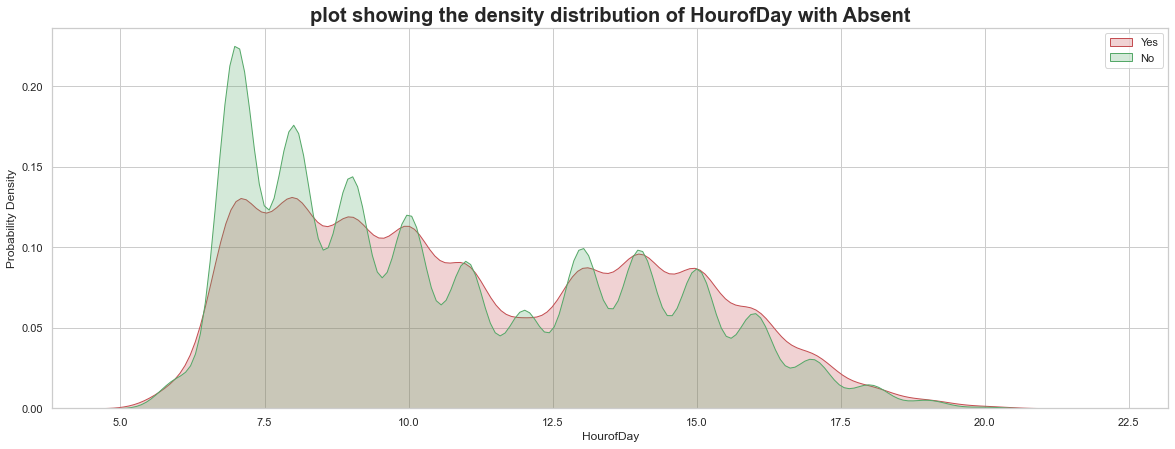

In [254]:
# A density plot showing the density distribution of HourofDay which has the absent option (yes or No).  
dr = density_plot('HourofDay', 'r', 'g' )
plt.title('plot showing the density distribution of HourofDay with Absent', fontweight="bold", size=20);


### Analysis by Age

>* The boxplot showing age distribution below shows the distribution of age across the data set, it is a fact that the data is  only a little skewed to the right. and the mean age is around 37, aslo the minimum age is 0 and the maximum age is 102, the 1st and 2nd quartile respectively are 18 and 55. There is also an outlier which is 115.
>* Also for the boxplot showing Age distribution vs absent, for "yes" box, it is seen the the data has it median is around 32,it minimum value at 0, and it maximum value at 92, also it's 1st and 3rd quartile are 18 and 52 respectively.it has an outlier aroung 115.  On the other hand, the boxplot for "No" Says otherwise, the box is a little skewed to the left and have more dispersion than the "yes" plot. the median age is around 38, its minimum age is also 0 but maximum age is 102.It also has an outlier aroun 115.
>* For the last plot showing the variation across Gender,there is no major difference, the skewness between the male and female gender are alike in both scenario.
>* Age distribution between 18 - 38 tends to show up more for there appointments as the yes box is a little skewed to the left.
>* The Age spread for those who honoured there appointment is more than those who did not.


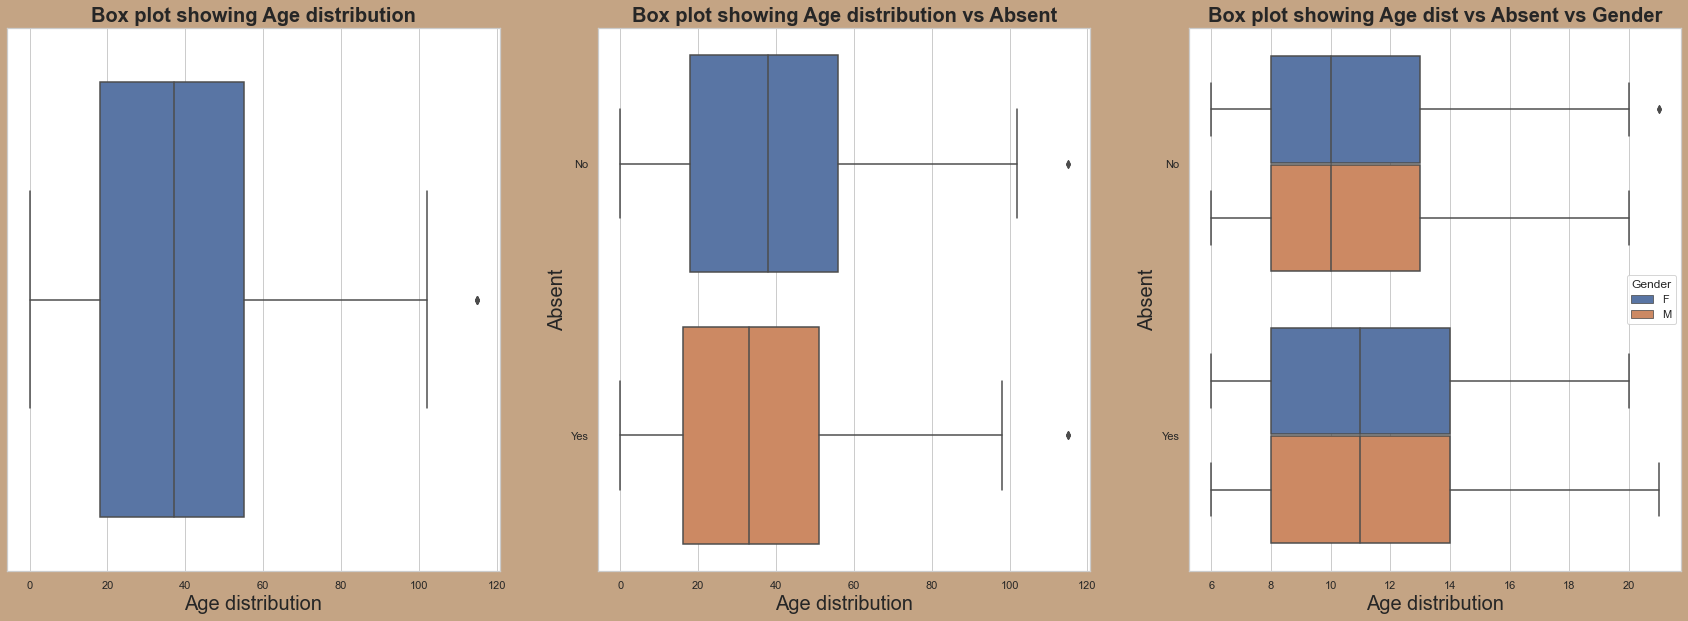

In [255]:
#Using Boxplot to get the distribution of Age across the dataset.
fig, (ax1, ax2, ax3)  = plt.subplots(nrows = 1, ncols = 3,  facecolor = '#C4A484', figsize=(30, 10))
sns.set(rc={'figure.figsize':(12,12)}, style='whitegrid')
sns.boxplot(data = dt
            ,x = 'Age',
            ax = ax1)
sns.boxplot(data = dt
            ,x = 'Age', y = 'Absent',
            ax = ax2)
sns.boxplot(data = dt
            ,x = 'HourofDay', y = 'Absent', hue = 'Gender',
            ax = ax3)
ax1.set_title('Box plot showing Age distribution',fontweight="bold", size=20)
ax1.set_xlabel('Age distribution', fontsize = 20.0)
ax2.set_title('Box plot showing Age distribution vs Absent',fontweight="bold", size=20)
ax2.set_ylabel('Absent', fontsize = 20.0)
ax2.set_xlabel('Age distribution', fontsize = 20.0)
ax3.set_title('Box plot showing Age dist vs Absent vs Gender',fontweight="bold", size=20)
ax3.set_ylabel('Absent', fontsize = 20.0)
ax3.set_xlabel('Age distribution', fontsize = 20.0);

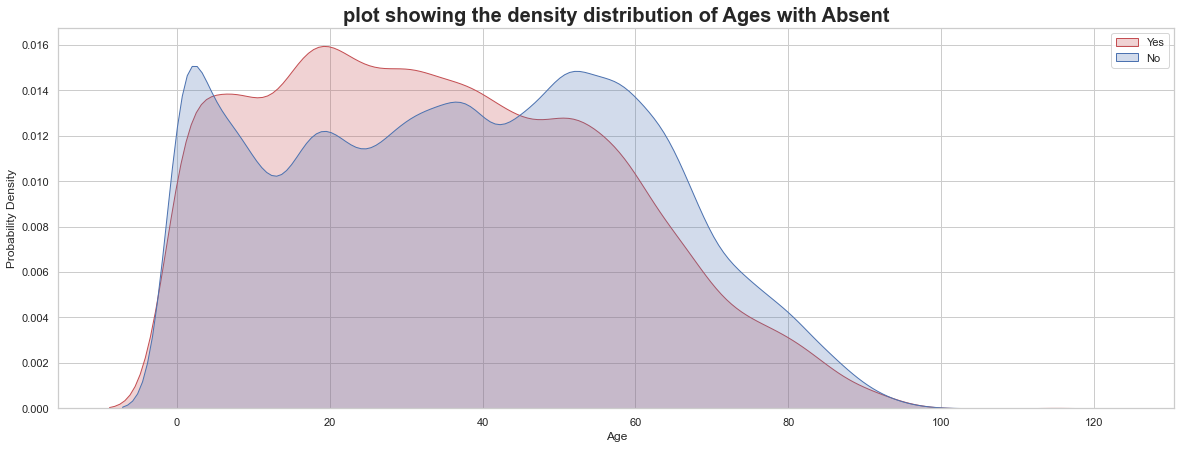

In [256]:
# Calling the density_plot function which shows the age distribution with Absent('yes','no')
dr = density_plot('Age', 'r', 'b')
plt.title('plot showing the density distribution of Ages with Absent', fontweight="bold", size=20);

### Analysis by Other Factors

>* For sms received, it is seen that when the values of Absent("yes" or "No") are in proportion, The people who dont recieve sms tend to attend there appointment more that people who recieved sms. this could be as a result of the fact that there are more people wh dont recive sms according to the dataset. Further data could explain why this is so.
>* There is only a slight difference for people Who are handicap, the few handicaps tends to have a slightly better ratio than those who are not
>* The distribution for alcoholism is normal.
>* people without scholarships tends to honour there appointments than people who have scholarships, This could be as a result of the fact that the number of people without scholarships are more than the people with scholarships, Futher data gathering could help with a more solid causation.
>* Hypertension patients tend to honour there appointments more. Only few patient are hypertensive and most of the few ones honour there appointments.
>* Diabetic patients tend to honour there appointments more. Only few patient are Diabetic and most of the few ones honour there appointments.

*hence most of the patient with each of the special ailments tends to honour thier appointments better according to the data provided, this might be as result of the fact that there numbers are very few resulting in a better accuracy than every other patients.* 

*Also people who dont recieve scholarships and sms tend to go for there appointments than people who do.this could be as a result of the fact that people who pay from their pockets value their money also it could be because very few people recieve sms and scholarships.*  

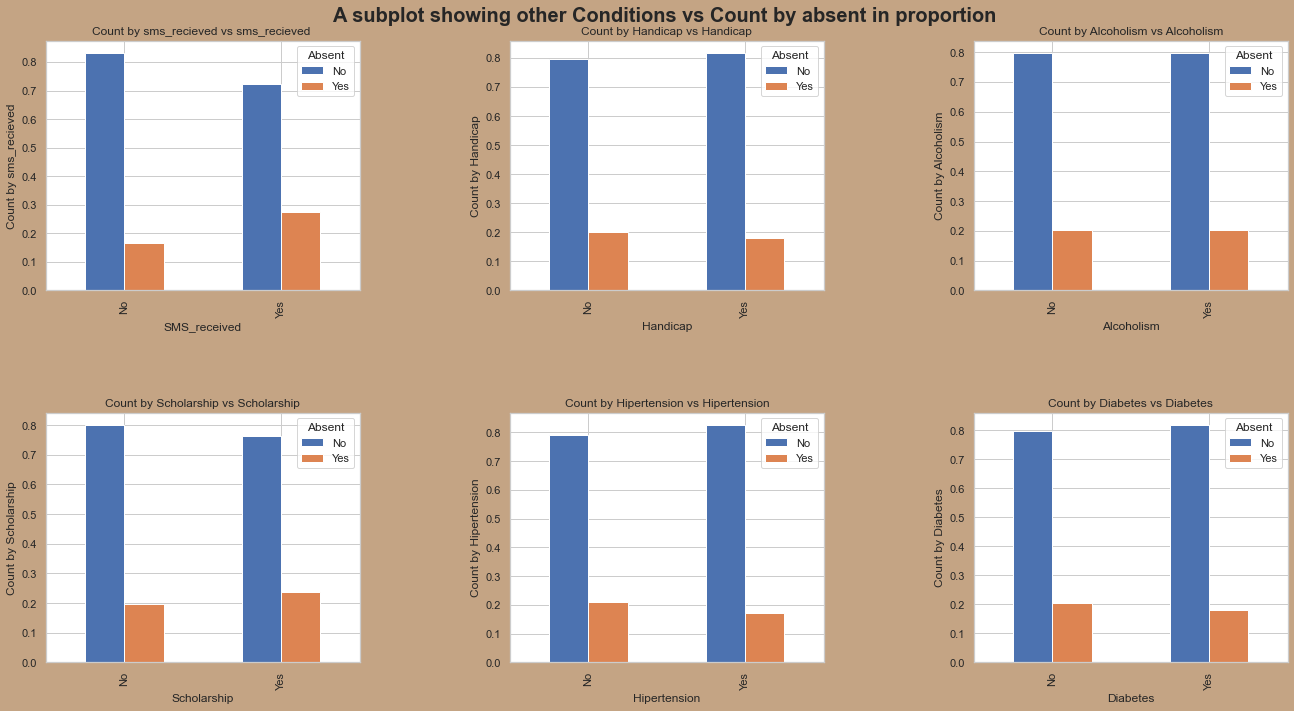

In [258]:
# Calling the condition_analysis function to get the other conditions vs count by Absent("yes","No") in proportion by setting the normalized to "index"
cross = condition_analysis('index', 'A subplot showing other Conditions vs Count by absent in proportion');
# 'A subplot showing other Conditions and Absent vs Count by absent'

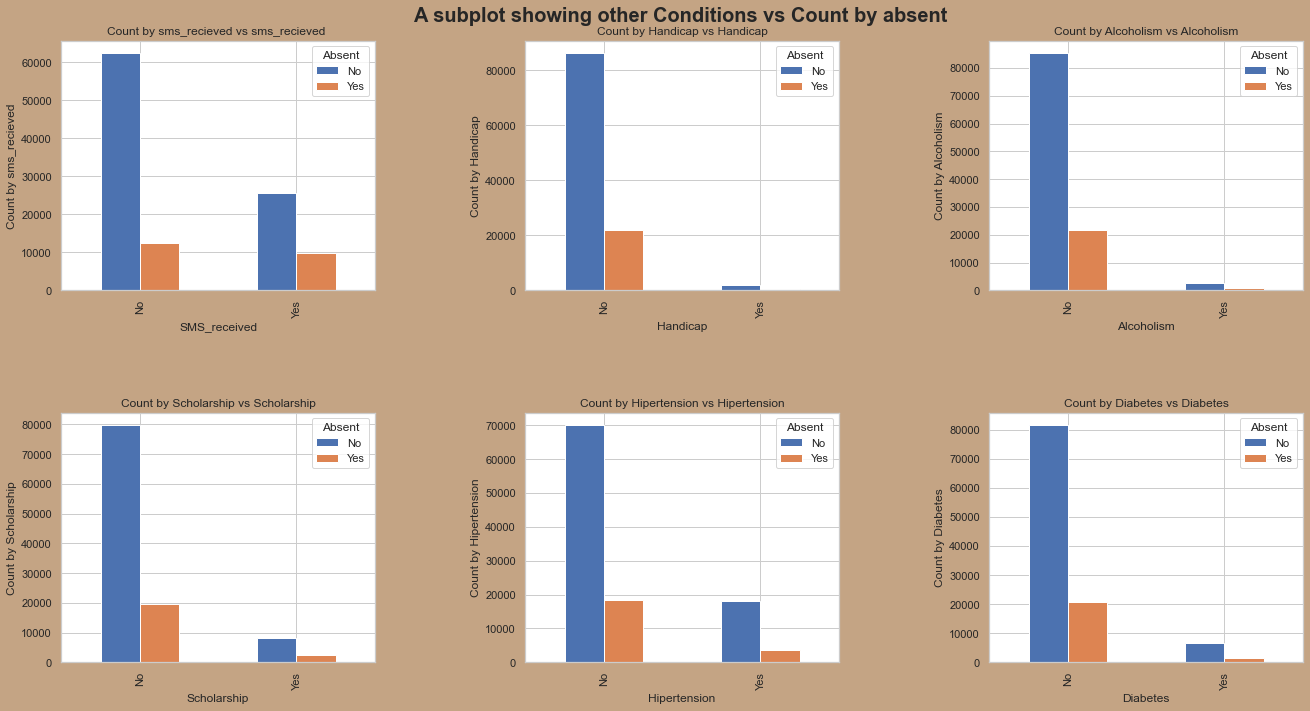

In [259]:
# Calling the condition_analysis function to get the other conditions vs count by Absent("yes","No") 
cross = condition_analysis(False, 'A subplot showing other Conditions vs Count by absent')


<a id="section-four"></a>
<h1 id="basics" style="font-family: Arials; font-size: 20px; font-style: bold; font-weight: bold; letter-spacing: 3px; color: #Fblack"> 
    4. Conclusion 🎖
        
    
</h1>


*After thoroughly going through the analysis process up untill [Section 3](#section-three), the following insights are  drawn*

>* It is obvious that the appointment scheduled for females are more than that of the males but when the relationship is normalized in proportion it is seen that more males are likely to attend thier meetings than females.


>* Patients will mostly show on Thursdays and wednessday and least show on Saturdays. 


>* Age distribution between 18 - 38 tends to show up more for there appointments as the yes box is a little skewed to the left.


>* The Age spread for those who honoured there appointment is more than those who did not.


>* Appointments between the 9th hour and the 13th hour are most likely to be attended.


>* From the probability density curve, it was seen that the probability difference for patients to be either absent or present i.e yes or no varies across the distribution. From the 6th hour to the 13th hour, patients are more like to be present than absent but from the 14th hour to the 20th hour they are more likely to be absent.


>* hence most of the patient with each of the special ailments tends to honour thier appointments better according to the data provided, this might be as result of the fact that there numbers are very few resulting in a better accuracy than every other patients.


>* Also people who dont recieve scholarships and sms tend to go for there appointments than people who do.this could be as a result of the fact that people who pay from their pockets value their money also it could be because very few people recieve sms and scholarships.  


*note: Most of the conclusions reached are just mere correlation according to the data that is available and not necessarily causations. availabity of data about patient behaviours and preference which are usaually very sensitive and private can help to properly figure out the causation of some of this findings.*

>* Some key references below:


>* <https://stackoverflow.com/questions/52056261/how-to-set-label-for-each-subplot-in-a-plot-in-matplotlib>


>* <https://stackoverflow.com/questions/28308822/how-to-change-the-font-size-for-multiple-axes-labels-created-with-host-subplot>


>* <https://www.statology.org/compare-box-plots/>


>* <https://www.geeksforgeeks.org/density-plots-with-pandas-in-python/>


>* <https://www.statology.org/matplotlib-subplot-spacing/>


>* <https://www.kaggle.com/code/oluwadarasimi99/google-capstone>

In [4]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295